In [1]:
import os
import pandas as pd
from micom.workflows import build
import cobra
import micom
from micom.media import minimal_medium
import matplotlib.pyplot as plt
import random
from micom import Community

In [2]:
directory_path = '/Users/edwin/Downloads/reconstructions/dfba/'  

In [3]:
 
def xml_dict(directory_path, extension='.xml'):
    # List all files in the directory with the specified extension
    files = [file for file in os.listdir(directory_path) if file.endswith(extension)]

    # Create a DataFrame to hold the data
    data = {
        "id": [],
        "genus": [],
        "species": [],
        "strain": [],
        "reactions": [],
        "metabolites": [],
        "file": [],
        "abundance": [],
        "sample_id": []
    }

    # Populate the DataFrame with information from the files
    for xml in files:
        filename = os.path.splitext(xml)[0]  # Get the filename without extension
        parts = filename.split('_')
        abundance = int(random.randint(1, 100))

        # Extract genus, species, and strain
        genus = parts[0]
        species = parts[1]
        strain = '_'.join(parts[2:])  # Combine all remaining parts for the strain

        # Construct the full path to the file
        full_path = os.path.join(directory_path, xml)
        
        # Read the model using cobra
        model = cobra.io.read_sbml_model(full_path)

        data["id"].append(filename)
        data["genus"].append(genus)
        data["species"].append(species)
        data["strain"].append(strain)
        data["reactions"].append(len(model.reactions))
        data["metabolites"].append(len(model.metabolites))
        data["file"].append(full_path)
        data["abundance"].append(abundance)  # Assuming equal abundance for all
        data["sample_id"].append("sample1")  # Assuming a single sample


    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data)

    return df

In [4]:
# create a taxonomy data dataframe
df = xml_dict(directory_path)

# Display the taxonmy DataFrame
print(df)

                                      id         genus           species  \
0         Ruminococcus_gnavus_ATCC_29149  Ruminococcus            gnavus   
1  Bacteroides_thetaiotaomicron_VPI_5482   Bacteroides  thetaiotaomicron   

       strain  reactions  metabolites  \
0  ATCC_29149       2225         1454   
1    VPI_5482       2524         1549   

                                                file  abundance sample_id  
0  /Users/edwin/Downloads/reconstructions/dfba/Ru...         60   sample1  
1  /Users/edwin/Downloads/reconstructions/dfba/Ba...         87   sample1  


In [5]:
# create a micom community
com = Community(df)

print("Build a community with a total of {} reactions.".format(len(com.reactions)))

Output()

Build a community with a total of 5403 reactions.


In [8]:
sol = com.cooperative_tradeoff(fraction=0.5, fluxes= True)

In [9]:
fluxes = sol.fluxes["EX_fru(e)"]
fluxes

compartment
Bacteroides_thetaiotaomicron_VPI_5482    31.555961
Ruminococcus_gnavus_ATCC_29149          -32.990461
medium                                         NaN
Name: EX_fru(e), dtype: float64

In [10]:
med = micom.media.minimal_medium(com, 0.8, min_growth=0.8)

In [11]:
med

EX_MGlcn178_m       0.017684
EX_MGlcn178_rl_m    0.017383
EX_MGlcn65_m        0.045387
EX_MGlcn65_rl_m     0.044579
EX_MGlcn67_m        0.484225
EX_MGlcn67_rl_m     0.472312
EX_alagln_m         0.166521
EX_ca2_m            0.004016
EX_cl_m             0.004016
EX_cobalt2_m        0.004016
EX_cu2_m            0.004016
EX_fe2_m            0.005482
EX_fe3_m            0.004016
EX_glyc3p_m         0.546485
EX_glygln_m         0.104296
EX_glymet_m         0.026056
EX_k_m              0.004016
EX_metala_m         0.025258
EX_mg2_m            0.004016
EX_mn2_m            0.004016
EX_pi_m             0.216868
EX_pnto_R_m         0.005100
EX_ribflv_m         0.005100
EX_zn2_m            0.004016
EX_hspg_m           0.011839
EX_pheme_m          0.001466
dtype: float64

In [12]:
for key in med.keys():
    if "MG" in key:
        med[key] = 10
    else:
        med[key] = 100

In [13]:
med

EX_MGlcn178_m        10.0
EX_MGlcn178_rl_m     10.0
EX_MGlcn65_m         10.0
EX_MGlcn65_rl_m      10.0
EX_MGlcn67_m         10.0
EX_MGlcn67_rl_m      10.0
EX_alagln_m         100.0
EX_ca2_m            100.0
EX_cl_m             100.0
EX_cobalt2_m        100.0
EX_cu2_m            100.0
EX_fe2_m            100.0
EX_fe3_m            100.0
EX_glyc3p_m         100.0
EX_glygln_m         100.0
EX_glymet_m         100.0
EX_k_m              100.0
EX_metala_m         100.0
EX_mg2_m            100.0
EX_mn2_m            100.0
EX_pi_m             100.0
EX_pnto_R_m         100.0
EX_ribflv_m         100.0
EX_zn2_m            100.0
EX_hspg_m           100.0
EX_pheme_m          100.0
dtype: float64

In [14]:
med["EX_glc_D_m"] = 1000
med["EX_fru_m"] = 1000

In [15]:
med

EX_MGlcn178_m         10.0
EX_MGlcn178_rl_m      10.0
EX_MGlcn65_m          10.0
EX_MGlcn65_rl_m       10.0
EX_MGlcn67_m          10.0
EX_MGlcn67_rl_m       10.0
EX_alagln_m          100.0
EX_ca2_m             100.0
EX_cl_m              100.0
EX_cobalt2_m         100.0
EX_cu2_m             100.0
EX_fe2_m             100.0
EX_fe3_m             100.0
EX_glyc3p_m          100.0
EX_glygln_m          100.0
EX_glymet_m          100.0
EX_k_m               100.0
EX_metala_m          100.0
EX_mg2_m             100.0
EX_mn2_m             100.0
EX_pi_m              100.0
EX_pnto_R_m          100.0
EX_ribflv_m          100.0
EX_zn2_m             100.0
EX_hspg_m            100.0
EX_pheme_m           100.0
EX_glc_D_m          1000.0
EX_fru_m            1000.0
dtype: float64

In [16]:
com.medium = med
com.optimize()

,abundance,growth_rate,reactions,metabolites
compartments,,,,
Bacteroides_thetaiotaomicron_VPI_5482,0.591837,43.881994,2524,1549
Ruminococcus_gnavus_ATCC_29149,0.408163,21.083618,2225,1454
medium,NaN,NaN,654,654


In [17]:
len(com.medium)

28

In [18]:
com.summary()

[11:57:39] WARNING  Non-linear or non-reaction model objective. Falling back to minimal        ]8;id=704217;file:///Users/edwin/.pyenv/versions/3.10.14/envs/pycomo/lib/python3.10/site-packages/cobra/summary/model_summary.py\model_summary.py]8;;\:]8;id=831147;file:///Users/edwin/.pyenv/versions/3.10.14/envs/pycomo/lib/python3.10/site-packages/cobra/summary/model_summary.py#133\133]8;;\
                    display.                                                                                       

Metabolite,Reaction,Flux,C-Number,C-Flux
MGlcn178_m,EX_MGlcn178_m,8.963,66,9.11%
MGlcn178_rl_m,EX_MGlcn178_rl_m,8.986,66,9.14%
MGlcn65_m,EX_MGlcn65_m,10,72,11.09%
MGlcn65_rl_m,EX_MGlcn65_rl_m,10,72,11.09%
MGlcn67_m,EX_MGlcn67_m,10,78,12.02%
MGlcn67_rl_m,EX_MGlcn67_rl_m,10,78,12.02%
alagln_m,EX_alagln_m,3.909,8,0.48%
ca2_m,EX_ca2_m,0.1476,0,0.00%
cl_m,EX_cl_m,0.1476,0,0.00%
cobalt2_m,EX_cobalt2_m,0.1476,0,0.00%


In [19]:
solution = com.cooperative_tradeoff(fraction=0.5, fluxes= True)

In [20]:
solution.fluxes['EX_glc_D_m'].medium

-94.06377075716495

In [21]:
so = com.optimize()
so.objective_value

34.576534847662586

In [22]:
for key in com.reactions:
    if "biomass" in key.id:
        print(key.id)

DM_biomass(e)__Ruminococcus_gnavus_ATCC_29149
biomass536__Ruminococcus_gnavus_ATCC_29149
DM_biomass(e)__Bacteroides_thetaiotaomicron_VPI_5482
biomass345__Bacteroides_thetaiotaomicron_VPI_5482


In [23]:
for i in so.members.index:
    if i != "medium":
        growth_rate = sol.members.growth_rate[i]
        print(growth_rate)

37.106584842378844
25.590748167147705


In [24]:
df = pd.DataFrame({
    'reaction': med.index,
    'flux': [med[i] for i in med.index]
})

In [25]:
df

,reaction,flux
0,EX_MGlcn178_m,10.0
1,EX_MGlcn178_rl_m,10.0
2,EX_MGlcn65_m,10.0
3,EX_MGlcn65_rl_m,10.0
4,EX_MGlcn67_m,10.0
5,EX_MGlcn67_rl_m,10.0
6,EX_alagln_m,100.0
7,EX_ca2_m,100.0
8,EX_cl_m,100.0
9,EX_cobalt2_m,100.0


In [26]:
def dfba_timestep(
        model,
        current_state,
        kinetic_params,
        species_growth,
        substrate_update_reactions,
        dt,
        biomass_identifier='biomass'
):
    updated_state = current_state.copy()
    
    for substrate, reaction_id in substrate_update_reactions.items():
        Km, Vmax = kinetic_params[substrate]
        substrate_concentration = updated_state[substrate]
        uptake_rate = Vmax * substrate_concentration / (Km + substrate_concentration)
        model.medium[reaction_id] = uptake_rate
        #print(uptake_rate)

    solution = model.optimize()
    sol = model.cooperative_tradeoff(fraction=0.5, fluxes= True)
    
    if solution.status == 'optimal':
        current_biomass = current_state[biomass_identifier]
        biomass_growth_rate = solution.objective_value
        updated_state[biomass_identifier] += biomass_growth_rate * current_biomass * dt
        
        for key in species_growth.keys():
            growth = species_growth[key]
            species_growth_rate = sol.members.growth_rate[key]
            updated_state[key] += species_growth_rate * growth * dt
            
        for substrate, reaction_id in substrate_update_reactions.items():
            flux = sol.fluxes[reaction_id].medium
            updated_state[substrate] = max(updated_state[substrate] + flux * current_biomass * dt, 0)
    else:
        # Handle non-optimal solutions if necessary
        pass

    return updated_state


def perform_dfba(
        model,
        initial_conditions,
        kinetic_params,
        species_growth,
        time_points,
        substrate_update_reactions,
        dt,
        biomass_identifier='biomass'
):
    results = {key: [value] for key, value in initial_conditions.items()}
    current_state = initial_conditions

    for t_i in range(1, len(time_points)):
        current_state = dfba_timestep(model,
                                      current_state,
                                      kinetic_params,
                                      species_growth,
                                      substrate_update_reactions,
                                      dt,
                                      biomass_identifier)

        # Store the current state in results
        for key in current_state:
            if key in results:
                results[key].append(current_state[key])
            else:
                results[key] = [current_state[key]]

    return results

def plot_dfba_results(time_points, dfba_results, title=''):
    plt.figure(figsize=(8, 5))
    for key, values in dfba_results.items():
        plt.plot(time_points, values, label=key.capitalize())

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend()
    plt.show()

In [27]:
# Define initial conditions, kinetic parameters, and other necessary inputs
species_growth = {}
for i in so.members.index:
    if i != "medium":
        species_growth[i] = sol.members.growth_rate[i]


initial_conditions = {
    'biomass': so.objective_value,  # Initial biomass concentration
    'glucose': 100, # Initial glucose concentration
    'fructose': 100   # Initial acetate concentration
}

initial_conditions_updated = {**initial_conditions, **species_growth} # combine the species growth and initial conditions


kinetic_params = {
    'glucose': (0.5, 2), # Km and Vmax for glucose
    'fructose': (0.5, 2)  # Km and Vmax for acetate
}
substrate_update_reactions = {
    'glucose': 'EX_glc_D_m',  # Exchange reaction ID for glucose
    'fructose': 'EX_fru_m'       # Exchange reaction ID for acetate
}

# simulation conditions
t_n = 100 # number of time points
dt = 0.001 # Time step, matching your setup
time_points = list(range(0, t_n))  # Simulation time points, matching your setup


In [28]:
initial_conditions_updated

{'biomass': 34.576534847662586,
 'glucose': 100,
 'fructose': 100,
 'Bacteroides_thetaiotaomicron_VPI_5482': 37.106584842378844,
 'Ruminococcus_gnavus_ATCC_29149': 25.590748167147705}

In [29]:
# Make sure to adjust the perform_dfba function if needed to initialize result arrays with sufficient size
dfba_results = perform_dfba(
    com, 
    initial_conditions_updated, 
    kinetic_params, 
    species_growth,
    time_points,  
    substrate_update_reactions, 
    dt,
    'biomass'
)

In [30]:
dfba_results

{'biomass': [34.576534847662586,
  35.77207160973421,
  37.00894589032127,
  38.288586997573226,
  39.61247366016258,
  40.98213573607531,
  42.399155980485354,
  43.865171874756086,
  45.3818775186823,
  46.951025588159375,
  48.57442936054186,
  50.25396481003197,
  51.991572775519245,
  53.789261203376775,
  55.64910746780536,
  57.57326077140725,
  59.56394462876338,
  61.623459435884065,
  63.754185128502435,
  65.95858393228244,
  68.23920320811948,
  70.59867839582175,
  73.0397360595738,
  75.56519703870173,
  78.17797970738089,
  80.881103347053,
  83.67769163544978,
  86.57097625625487,
  89.56430063357543,
  92.66112379553877,
  95.8650243714788,
  99.17970472733126,
  102.60899524401671,
  106.1568587437551,
  109.82739506942694,
  113.62484582227299,
  117.5535992634071,
  121.61819538480646,
  125.82333115563905,
  130.173865949991,
  134.67482716226584,
  139.33141601674487,
  144.14901357802202,
  149.13318696925867,
  154.28969580544424,
  159.62449884909645,
  165.143

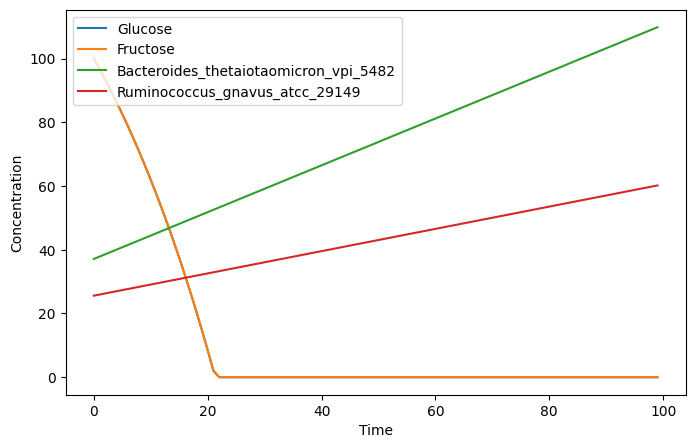

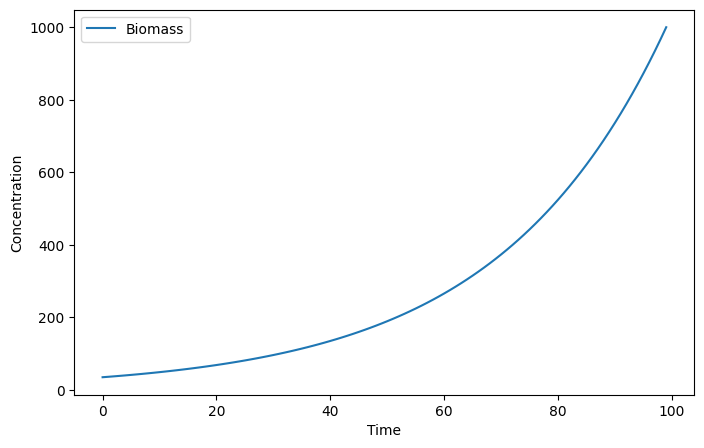

In [31]:
nutrient_results = {key: value for key, value in dfba_results.items() if key != 'biomass'}
biomass_results = {key: value for key, value in dfba_results.items() if key == 'biomass'}
plot_dfba_results(time_points, nutrient_results)
plot_dfba_results(time_points, biomass_results)

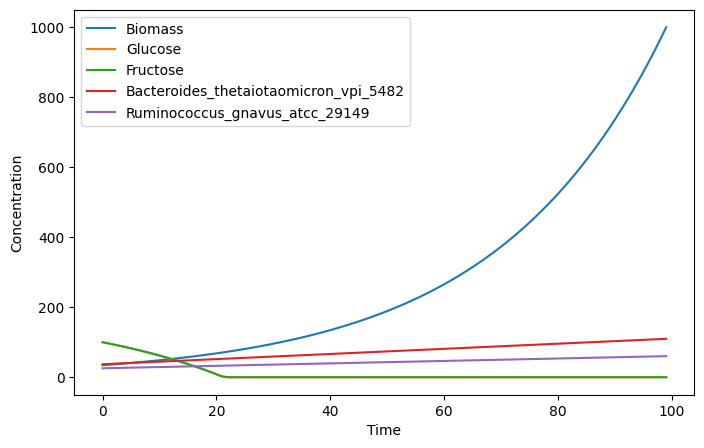

In [32]:
plot_dfba_results(time_points, dfba_results)

In [33]:
def dfba_timestep(
        model,
        current_state,
        kinetic_params,
        species_growth,
        substrate_update_reactions,
        dt,
        biomass_identifier='biomass',
        substrate_threshold=1e-6  # Small threshold to consider substrate as depleted
):
    updated_state = current_state.copy()
    
    # Check if any of the key substrates (glucose, fructose) are depleted
    key_substrates_depleted = all(
        updated_state[substrate] < substrate_threshold
        for substrate in ['glucose', 'fructose']
    )
    
    # If substrates are depleted, skip growth and stop uptake
    if key_substrates_depleted:
        return updated_state  # No growth or updates

    # Otherwise, proceed with normal update logic
    for substrate, reaction_id in substrate_update_reactions.items():
        Km, Vmax = kinetic_params[substrate]
        substrate_concentration = updated_state[substrate]
        uptake_rate = Vmax * substrate_concentration / (Km + substrate_concentration)
        model.medium[reaction_id] = uptake_rate

    solution = model.optimize()
    sol = model.cooperative_tradeoff(fraction=0.5, fluxes=True)

    if solution.status == 'optimal':
        current_biomass = current_state[biomass_identifier]
        biomass_growth_rate = solution.objective_value
        
        # Update biomass only if key substrates are not depleted
        updated_state[biomass_identifier] += biomass_growth_rate * current_biomass * dt
        
        # Update species-specific growth
        for key in species_growth.keys():
            growth = species_growth[key]
            species_growth_rate = sol.members.growth_rate[key]
            updated_state[key] += species_growth_rate * growth * dt
            
        # Update substrate concentrations
        for substrate, reaction_id in substrate_update_reactions.items():
            flux = sol.fluxes[reaction_id].medium
            updated_state[substrate] = max(updated_state[substrate] + flux * current_biomass * dt, 0)
    else:
        # Handle non-optimal solutions if necessary
        pass

    return updated_state

In [34]:
# Define initial conditions, kinetic parameters, and other necessary inputs
species_growth = {}
for i in so.members.index:
    if i != "medium":
        species_growth[i] = sol.members.growth_rate[i]


initial_conditions = {
    'biomass': so.objective_value,  # Initial biomass concentration
    'glucose': 100, # Initial glucose concentration
    'fructose': 100   # Initial acetate concentration
}

initial_conditions_updated = {**initial_conditions, **species_growth} # combine the species growth and initial conditions


kinetic_params = {
    'glucose': (0.5, 2), # Km and Vmax for glucose
    'fructose': (0.5, 2)  # Km and Vmax for acetate
}
substrate_update_reactions = {
    'glucose': 'EX_glc_D_m',  # Exchange reaction ID for glucose
    'fructose': 'EX_fru_m'       # Exchange reaction ID for acetate
}

# simulation conditions
t_n = 100 # number of time points
dt = 0.001 # Time step, matching your setup
time_points = list(range(0, t_n))  # Simulation time points, matching your setup

In [35]:
# Make sure to adjust the perform_dfba function if needed to initialize result arrays with sufficient size
dfba_results = perform_dfba(
    com, 
    initial_conditions_updated, 
    kinetic_params, 
    species_growth,
    time_points,  
    substrate_update_reactions, 
    dt,
    'biomass'
)

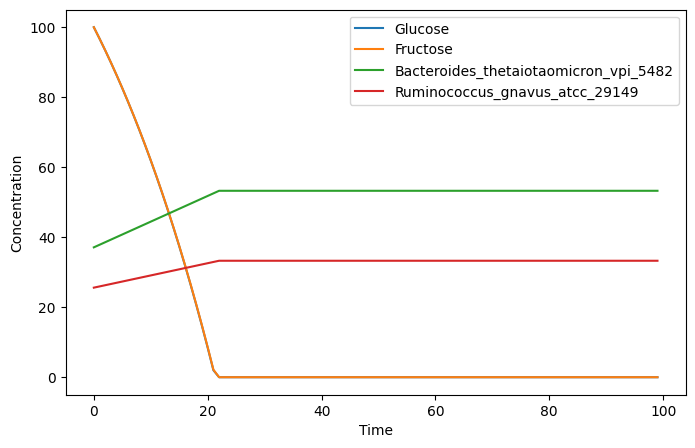

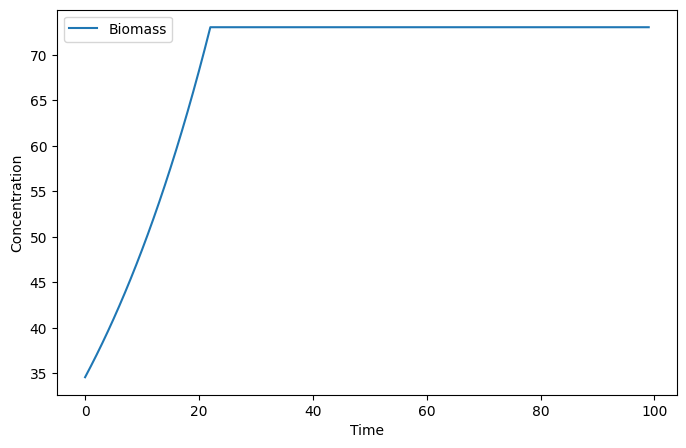

In [36]:
nutrient_results = {key: value for key, value in dfba_results.items() if key != 'biomass'}
biomass_results = {key: value for key, value in dfba_results.items() if key == 'biomass'}
plot_dfba_results(time_points, nutrient_results)
plot_dfba_results(time_points, biomass_results)

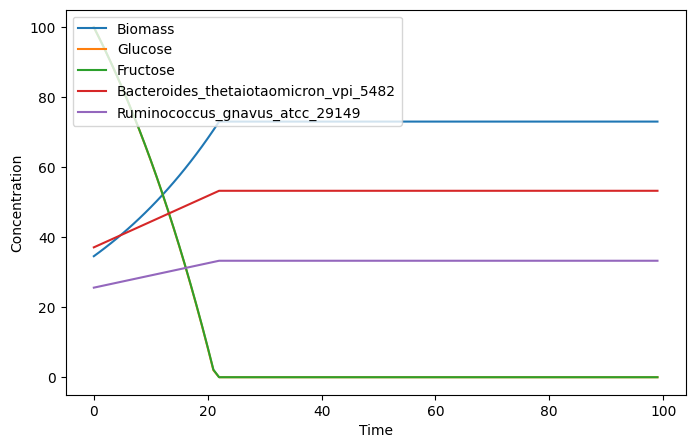

In [37]:
plot_dfba_results(time_points, dfba_results)